In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('./Image/lena.jpg', cv2.IMREAD_COLOR)

In [4]:
img.shape

(225, 400, 3)

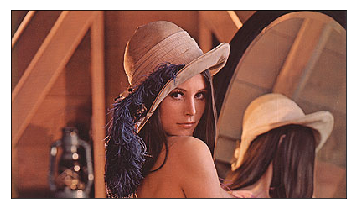

In [5]:
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_im)
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
def draw_img(image):
    cvt_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(cvt_image)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [7]:
def draw_gray_img(image):
    plt.imshow(image,'gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [8]:
gray_im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('lenagray.png',gray_im)

True

## 도형그리기

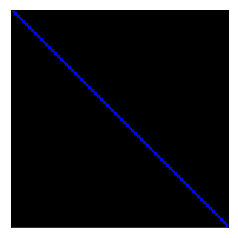

In [9]:
img = np.zeros((512, 512, 3), np.uint8)
img = cv2.line(img, (0, 0), (511, 511), (255, 0, 0), 5)

draw_img(img)

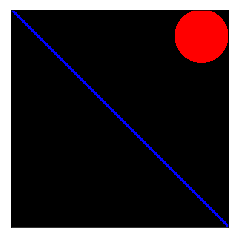

In [10]:
img = cv2.circle(img, (447,63), 63, (0,0,255), -1)
draw_img(img)

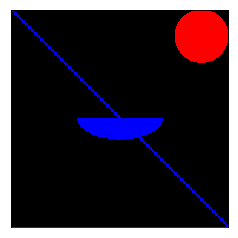

In [11]:
img = cv2.ellipse(img, (256,256), (100,50), 0, 0, 180, 255, -1)
draw_img(img)

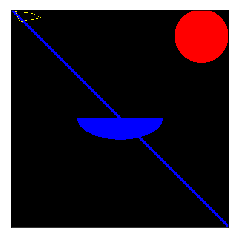

In [12]:
pts = np.array([[10,5], [20,30], [70,20], [50,10]], np.int32) # 각 꼭지점은 2차원 행렬로 선언
# 이미지에 표현하기 위해 3차원 행렬로 변환. 변환이전과 이후의 행렬 갯수는 동일해야함.
# -1은 원본에 해당하는 값을 그대로 유지.
pts = pts.reshape((-1, 1, 2))
img = cv2.polylines(img, [pts], True, (0,255,255))
draw_img(img)

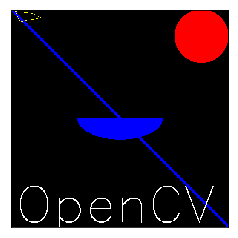

In [13]:
cv2.putText(img, 'OpenCV', (10,500), 
            cv2.FONT_HERSHEY_SIMPLEX, 4, (255,255,255), 2)
draw_img(img)

In [14]:
import cv2
import numpy as np

In [15]:
img = cv2.imread('./Image/lena.jpg')

In [16]:
px = img[100,200] #BGR
print (px)

[24 17 30]


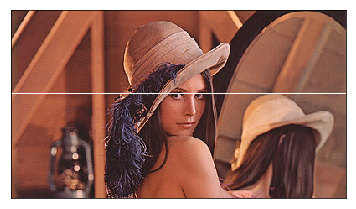

In [17]:
img[100][:] = [255,255,255]
draw_img(img)

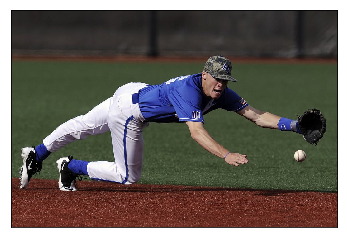

In [18]:
img = cv2.imread('./Image/baseball-player.jpg')
draw_img(img)

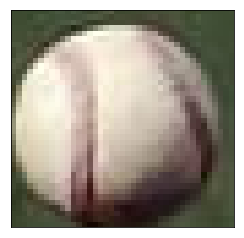

In [19]:
ball = img[450:490,909:950] # img[행의 시작점: 행의 끝점, 열의 시작점: 열의 끝점]
draw_img(ball)

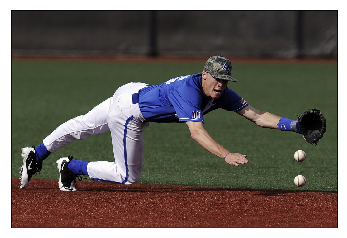

In [20]:
img[530:570,909:950] = ball # 동일 영역에 Copy
draw_img(img)

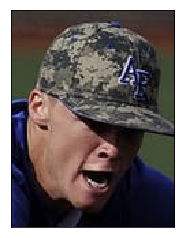

In [21]:
head = img[140:300,600:720] # img[행의 시작점: 행의 끝점, 열의 시작점: 열의 끝점]
draw_img(head)

120 240
240 360
360 480
480 600


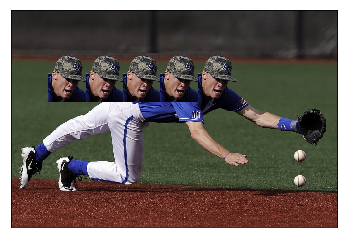

In [22]:
for i in range(1,5):
    x1 = i*(840-720)
    x2 = x1+(840-720)
    print (x1,x2)
    img[140:300,x1:x2] = head # 동일 영역에 Copy
draw_img(img)

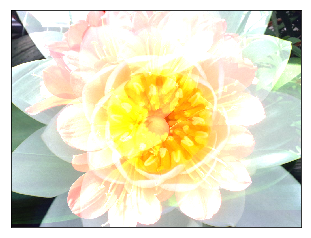

In [23]:
img1 = cv2.imread('./Image/flower1.jpg')
img2 = cv2.imread('./Image/flower2.jpg')

img = cv2.add(img1, img2)
draw_img(img)

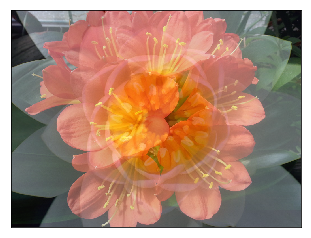

In [24]:
w = 50 # 0 to 100
dst = cv2.addWeighted(img1,float(100-w) * 0.01, 
                      img2,float(w) * 0.01,
                      0)
draw_img(dst)

## Image 임계처리

In [25]:
img = cv2.imread('./Image/grad.jpg')
gry_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

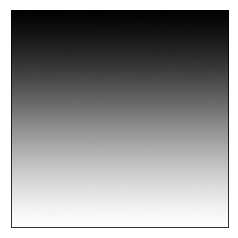

In [26]:
draw_gray_img(gry_img)

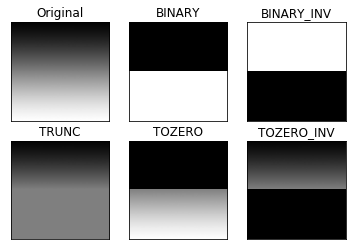

In [27]:
ret, thresh1 = cv2.threshold(img,127,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

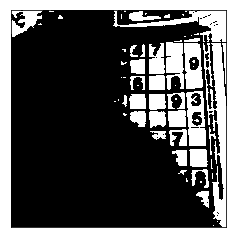

In [32]:
img = cv2.imread('./Image/sudoku.jpg')
gry_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, th1 = cv2.threshold(gry_img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(gry_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,15,2)

plt.imshow(th1,'gray')
plt.xticks([]),plt.yticks([])
plt.show()

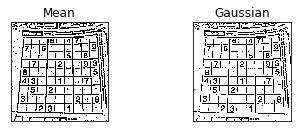

In [36]:
img = cv2.imread('./Image/sudoku.jpg')
gry_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, th1 = cv2.threshold(gry_img,127,255,cv2.THRESH_BINARY)
## 단순 threshold 적용이미지

th2 = cv2.adaptiveThreshold(gry_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(gry_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,15,2)

titles = ['Mean','Gaussian']

images = [th2,th3]

for i in range(2):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


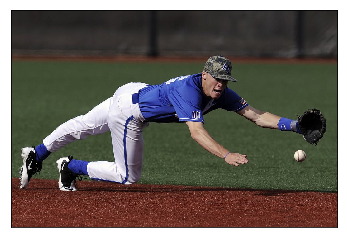

(700, 1050, 3)


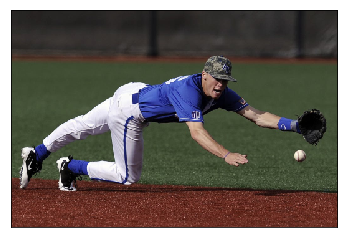

(350, 525, 3)


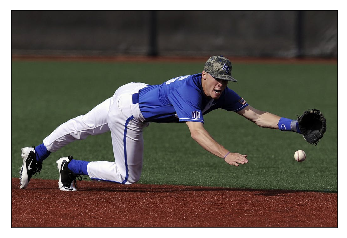

(1400, 2100, 3)


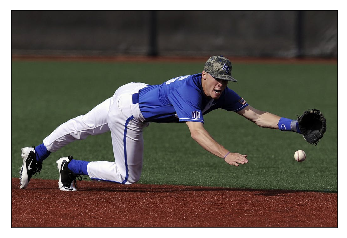

(1400, 2100, 3)


In [37]:
img = cv2.imread('./Image/baseball-player.jpg')

# 행 : Height, 열:width
height, width = img.shape[:2]

# 이미지 축소
shrink = cv2.resize(img, None, fx=0.5, fy=0.5, 
                    interpolation=cv2.INTER_AREA)

# Manual Size지정
zoom1 = cv2.resize(img, (width*2, height*2), 
                   interpolation=cv2.INTER_CUBIC)

# 배수 Size지정
zoom2 = cv2.resize(img, None, fx=2, fy=2, 
                   interpolation=cv2.INTER_CUBIC)

draw_img(img)
print(img.shape)
draw_img(shrink)
print(shrink.shape)
draw_img(zoom1)
print(zoom1.shape)
draw_img(zoom2)
print(zoom2.shape)

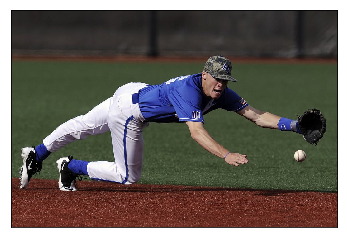

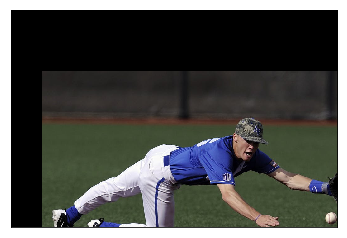

In [38]:
img = cv2.imread('./Image/baseball-player.jpg')

rows, cols = img.shape[:2]

# 변환 행렬, X축으로 10, Y축으로 20 이동
M = np.float32([[1,0,100],[0,1,200]])

dst = cv2.warpAffine(img, M,(cols, rows))
draw_img(img)
draw_img(dst)

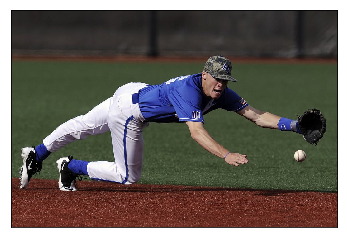

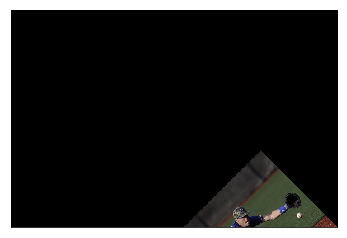

In [39]:
rows, cols = img.shape[:2]

# 이미지의 중심점을 기준으로 45도 회전 하면서 0.5배 Scale
#M= cv2.getRotationMatrix2D((cols/2, rows/2),45, 0.5)
M= cv2.getRotationMatrix2D((cols, rows),45, 0.5)

dst = cv2.warpAffine(img, M,(cols, rows))
draw_img(img)
draw_img(dst)

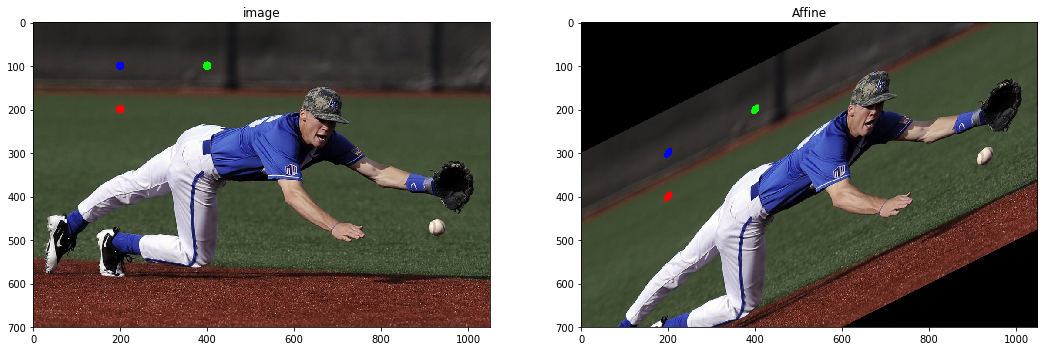

In [152]:
img = cv2.imread('./Image/baseball-player.jpg')
rows, cols, ch = img.shape

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (200,100), 10, (255,0,0),-1)
cv2.circle(img, (400,100), 10, (0,255,0),-1)
cv2.circle(img, (200,200), 10, (0,0,255),-1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.figure(figsize=(18, 18))

cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cvt_dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(cvt_img),plt.title('image')
plt.subplot(122),plt.imshow(cvt_dst),plt.title('Affine')
plt.show()

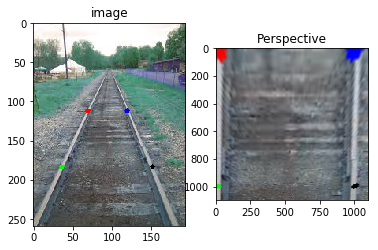

In [156]:
img = cv2.imread('./Image/railroad.jpeg')
# [x,y] 좌표점을 4x2의 행렬로 작성
# 좌표점은 좌상->좌하->우상->우하 36, 183
pts1 = np.float32([[69,112],[36,183],[119,112],[151,183]])

# 좌표의 이동점
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (69,112), 3, (255,0,0),-1)
cv2.circle(img, (36,183), 3, (0,255,0),-1)
cv2.circle(img, (119,112), 3, (0,0,255),-1)
cv2.circle(img, (151,183), 3, (0,0,0),-1)

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (1100,1100))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()


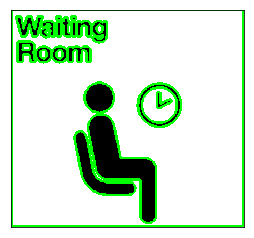

In [57]:
img = cv2.imread('./Image/Pictogram.png')

imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#threshold를 이용하여 binary image로 변환
ret, thresh = cv2.threshold(imgray,127,255,0)

#contours는 point의 list형태.
#hierachy는 contours line의 계층 구조
image, contours, hierachy = cv2.findContours(thresh, 
                                             cv2.RETR_TREE,
                                             cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(img, contours, -1, (0,255,0), 3)

draw_gray_img(image)

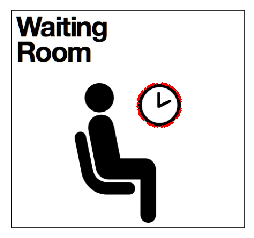

In [66]:
img = cv2.imread('./Image/Pictogram.png')
img_cnt = cv2.drawContours(img, contours[3], -1, (255,0,0), 3)
draw_gray_img(img_cnt)

In [69]:
# Contour의 면적
area = cv2.contourArea(contours[3])
print (area)

# Contour의 둘레 길
closed_form = cv2.arcLength(contours[3], True)
open_form   = cv2.arcLength(contours[3], False)
print (closed_form,open_form)

5114.5
268.35028648376465 264.35028648376465


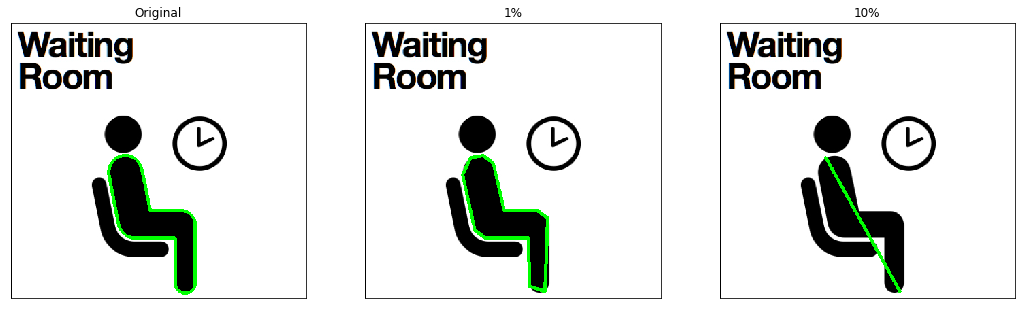

In [84]:
img = cv2.imread('./Image/Pictogram.png')
img1 = img.copy()
img2 = img.copy()


cnt = contours[2]

# 적용하는 숫자가 커질 수록 Point의 갯수는 감소
epsilon1 = 0.01*cv2.arcLength(cnt, True)
epsilon2 = 0.1*cv2.arcLength(cnt, True)

approx1 = cv2.approxPolyDP(cnt, epsilon1, True)
approx2 = cv2.approxPolyDP(cnt, epsilon2, True)

cv2.drawContours(img, [cnt],0,(0,255,0),3) # 215개의 Point
cv2.drawContours(img1, [approx1], 0,(0,255,0), 3) # 21개의 Point
cv2.drawContours(img2, [approx2], 0,(0,255,0), 3) # 4개의 Point

titles = ['Original', '1%', '10%']
images = [img, img1, img2]

plt.figure(figsize=(18, 18))
for i in range(3):
    
    plt.subplot(1,3,i+1), plt.title(titles[i]), plt.imshow(images[i])
    plt.xticks([]), plt.yticks([])

plt.show()

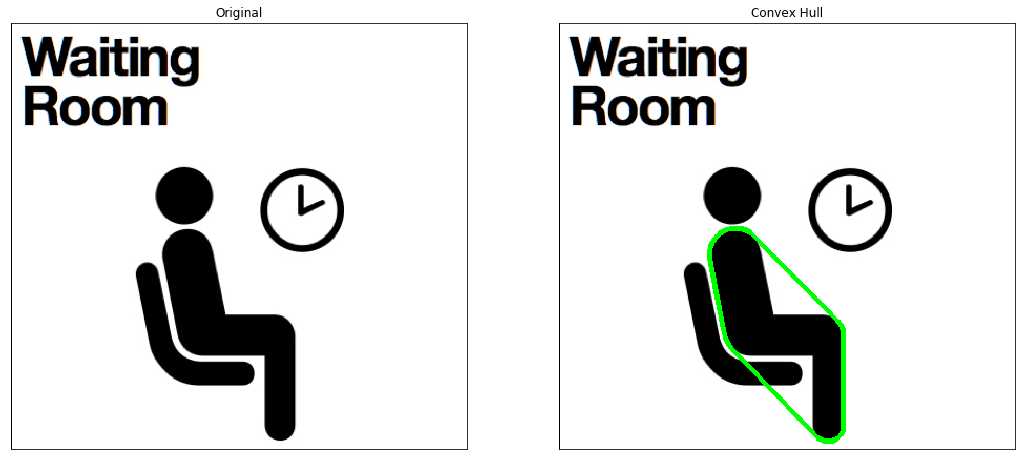

In [88]:
img = cv2.imread('./Image/Pictogram.png')
img1 = img.copy()

imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray,127,255,0)

image, contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[2] 
hull = cv2.convexHull(cnt)

cv2.drawContours(img1, [hull], 0,(0,255,0), 3)

titles = ['Original','Convex Hull']
images = [img, img1]

plt.figure(figsize=(18, 18))
for i in range(2):
    plt.subplot(1,2,i+1), plt.title(titles[i]), plt.imshow(images[i])
    plt.xticks([]), plt.yticks([])

plt.show()